**Importing libraries**

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**Using connected component labelling to segment objects in an image**

Original image shape (1080, 1920, 3)


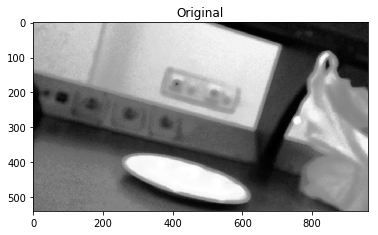

total labels  6
stat  (6, 5)
centroid (6, 2)
label_hue (540, 960)
Areas of labels [[     0      0    960    540 499096]
 [   274    385    330    122  18775]]
connected image shape (540, 960, 3)


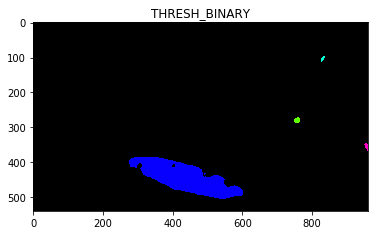

x: 274 y 385 width 330 height 122
width_over_height 2.7049180327868854


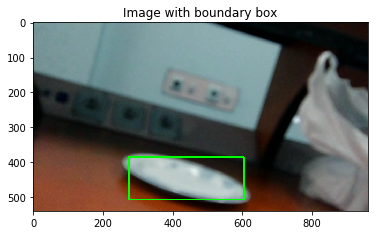

In [0]:
kernel = np.ones((5,5),np.float32)/25
methods = [
    ("THRESH_BINARY", cv2.THRESH_BINARY),
    #("THRESH_BINARY_INV", cv2.THRESH_BINARY_INV),
    #("THRESH_TRUNC", cv2.THRESH_TRUNC),
    #("THRESH_TOZERO", cv2.THRESH_TOZERO),
    #("THRESH_TOZERO_INV", cv2.THRESH_TOZERO_INV)
    ]

im = cv2.imread('test/0001602.jpg')
print('Original image shape',im.shape)
im= cv2.filter2D(im,-1,kernel)

im=cv2.resize(im, (0,0), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray=cv2.equalizeHist(imgray)
plt.imshow(imgray,cmap='gray')
plt.title('Original')
plt.show()

for (threshName, threshMethod) in methods:
    # threshold the image and show it
    (T, thresh) = cv2.threshold(imgray, 245, 255, threshMethod)
    output= cv2.connectedComponentsWithStats(thresh.astype(np.uint8),8,cv2.CV_32S)
    total=output[0]
    labels=output[1]
    stat=output[2]
    centroid=output[3] 
    print('total labels ',total)
    print('stat ',stat.shape)
    print('centroid',centroid.shape)
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    print('label_hue',label_hue.shape)
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
#
    # set bg label to black
    labeled_img[label_hue==0] = 0
 #   im2,contours,hierarchy = cv2.findContours(cv2.cvtColor(labeled_img,cv2.COLOR_BGR2GRAY), 1, 2)
 #   print(np.array(im2).shape)
 #   print(np.array(contours).shape)
 ##   print(np.array(hierarchy).shape)
  ##  image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #image = cv2.drawContours(labeled_img, contours,0, (0,255,0), 3)
    #new=np.zeros(labeled_img.shape)
    #unique=0
    #unq_list=[]
    pred_areas=stat[stat[:,4]>1000]
    print('Areas of labels',pred_areas)
    print('connected image shape',labeled_img.shape)
    plt.imshow(labeled_img,cmap='gray')
    plt.title(threshName)
    plt.show()
    for i in range(len(pred_areas)):
        WOH=pred_areas[i,2]/pred_areas[i,3]
        if (WOH>3.5 and WOH<4):
            break
    index=i
    img=im
    print('x:',pred_areas[index,0],'y',pred_areas[index,1],'width',pred_areas[index,2],'height',pred_areas[index,3])
    print('width_over_height',pred_areas[index,2]/pred_areas[index,3])
    x_=pred_areas[index,0]+pred_areas[index,2]
    y_=pred_areas[index,1]+pred_areas[index,3]
    bd_box=cv2.rectangle(img,(pred_areas[index,0],pred_areas[index,1]),(x_,y_),(0,255,0),3)
    plt.imshow(bd_box)
    plt.title('Image with boundary box')
    img=None
    bd_box=None
    x_=None
    y_=None
    plt.show()

In [0]:
def ImageSegmentor(im,WOH):
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    imgray=cv2.equalizeHist(imgray)
    calc_woh=0
    OBJECT_NOT_FOUND=1
    th=250
    while(not(calc_woh==WOH) and w> OBJECT_NOT_FOUND==1):

        (T, thresh) = cv2.threshold(imgray,th, 255, cv2.THRESH_BINARY)
        output= cv2.connectedComponentsWithStats(thresh.astype(np.uint8),8,cv2.CV_32S)
        labels=output[1]
        stat=output[2] 
        pred_areas=stat[stat[:,4]>10000]
        for i in range(pred_areas.shape[0]):
            if(round(pred_areas[i,2]/pred_areas[i,3],1)==WOH):
                calc_woh=WOH
                index=i
                break;
        if th<50:
            OBJECT_NOT_FOUND=0
        else:
            th=th-1
            print(th)
    
    if (calc_woh==WOH):
        #Return left x , top y , width, height
        return [pred_areas[index,0],pred_areas[index,1],pred_areas[index,2],pred_areas[index,3]]
        

**Calculating threshold for an object depending upon the width over height metric**

249
248
247
246
245
244
243
242
241
240
239
238
237
236
235
x: 518 y: 812 w: 336 h: 194


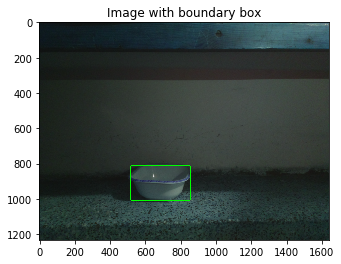

In [0]:
im = cv2.imread('bowl/01.jpg')
kernel = np.ones((5,5),np.float32)/25
im= cv2.filter2D(im,-1,kernel)
im=cv2.resize(im, (0,0), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
x,y,w,h=ImageSegmentor(im,1.7)
print('x:',x,'y:',y,'w:',w,'h:',h)
x_=x+w
y_=y+h
bd_box=cv2.rectangle(im,(x,y),(x_,y_),(0,255,0),3)
plt.imshow(bd_box)
plt.title('Image with boundary box')
plt.show()